In [11]:
!pip install skforecast
#Ejemplo de pronóstico
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_openml  # Import the necessary function
from skforecast.datasets import fetch_dataset
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.5/670.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [12]:
# Descarga y procesado de datos
# ==============================================================================
air_quality = fetch_dataset(name="air_quality_valencia")
#air_quality = fetch_openml(name="air_quality_valencia") # Use fetch_openml instead of fetch_dataset


air_quality_valencia
--------------------
Hourly measures of several air chemical pollutant (pm2.5, co, no, no2, pm10,
nox, o3, so2) at Valencia city.
 Red de Vigilancia y Control de la Contaminación Atmosférica, 46250054-València
- Centre, https://mediambient.gva.es/es/web/calidad-ambiental/datos-historicos.
Shape of the dataset: (26304, 10)


In [13]:
# Imputación de datos ausentes mediante interpolación lineal
# ==============================================================================
air_quality = air_quality.interpolate(method="linear")
air_quality = air_quality.sort_index()
air_quality.head()


,pm2.5,co,no,no2,pm10,nox,o3,veloc.,direc.,so2
datetime,,,,,,,,,,
2019-01-01 00:00:00,19.0,0.2,3.0,36.0,22.0,40.0,16.0,0.5,262.0,8.0
2019-01-01 01:00:00,26.0,0.1,2.0,40.0,32.0,44.0,6.0,0.6,248.0,8.0
2019-01-01 02:00:00,31.0,0.1,11.0,42.0,36.0,58.0,3.0,0.3,224.0,8.0
2019-01-01 03:00:00,30.0,0.1,15.0,41.0,35.0,63.0,3.0,0.2,220.0,10.0
2019-01-01 04:00:00,30.0,0.1,16.0,39.0,36.0,63.0,3.0,0.4,221.0,11.0


In [14]:
# Comprobación de índice y frecuencia
# ==============================================================================
print(f"Tipo de índice: {air_quality.index.dtype}")
print(f"Frecuencia: {air_quality.index.freq}")

Tipo de índice: datetime64[ns]
Frecuencia: <Hour>


In [16]:

import csv
import pandas as pd

# Ruta a tu archivo de etiquetas
#archivo_csv = "airquality_alicante.csv"

# Leer el archivo CSV en un DataFrame especificando el delimitador
df = air_quality

# Asegurar que la columna 'Fecha' esté en formato datetime
#df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
#df = df.drop(columns=[' '])
# Eliminar espacios en los nombres de las columnas si es necesario
#df.columns = df.columns.str.strip()
# Reemplazar comas por puntos y convertir a float
# Eliminar los puntos de los miles y reemplazar comas por puntos decimales
#df['TRM'] = df['TRM'].str.replace('.', '', regex=False).str.replace(',', '.').astype(float)

# Verificar resultados
print(df.head())
print("columnas", df.columns)
print("tipo", df.dtypes)  # Verifica el tipo de datos de la columna 'TRM'

                     pm2.5   co    no   no2  pm10   nox    o3  veloc.  direc.  \
datetime                                                                        
2019-01-01 00:00:00   19.0  0.2   3.0  36.0  22.0  40.0  16.0     0.5   262.0   
2019-01-01 01:00:00   26.0  0.1   2.0  40.0  32.0  44.0   6.0     0.6   248.0   
2019-01-01 02:00:00   31.0  0.1  11.0  42.0  36.0  58.0   3.0     0.3   224.0   
2019-01-01 03:00:00   30.0  0.1  15.0  41.0  35.0  63.0   3.0     0.2   220.0   
2019-01-01 04:00:00   30.0  0.1  16.0  39.0  36.0  63.0   3.0     0.4   221.0   

                      so2  
datetime                   
2019-01-01 00:00:00   8.0  
2019-01-01 01:00:00   8.0  
2019-01-01 02:00:00   8.0  
2019-01-01 03:00:00  10.0  
2019-01-01 04:00:00  11.0  
columnas Index(['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.',
       'so2'],
      dtype='object')
tipo pm2.5     float64
co        float64
no        float64
no2       float64
pm10      float64
nox       float64
o

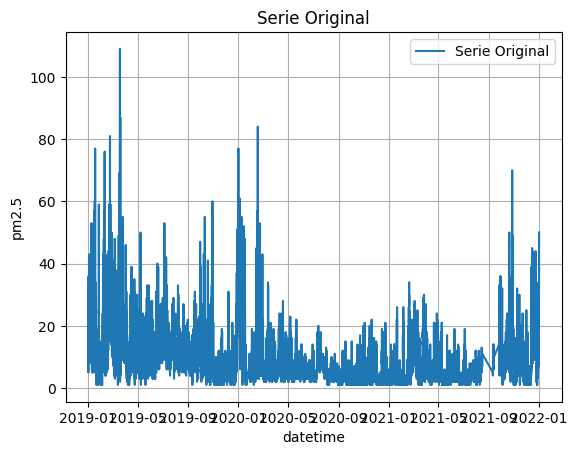

In [24]:
# 3. Gráfica de la serie original
plt.plot(df.index, df['pm2.5'], label='Serie Original') # Use df.index assuming 'datetime' is your index
plt.title('Serie Original')
plt.xlabel('datetime')
plt.ylabel('pm2.5')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
print(df.columns)

Index(['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.',
       'so2'],
      dtype='object')


In [29]:
#Descomposición de la serie de tiempo

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Como se tiene el DataFrame df con las columnas 'datetime' y 'pm2.5'

# Configurar la columna 'datetime' como índice
#df.set_index('datetime', inplace=True)

# Asegurarse de que el índice sea un DatetimeIndex
#if not isinstance(df.index, pd.DatetimeIndex):
#    raise ValueError("El índice del DataFrame debe ser un DatetimeIndex.")

#Nota: Después de establecer la columna 'Fecha' como índice, no estará disponible
#como una columna en el DataFrame df. Por tanto, debe volverse a ejecutar todo el código
#porque, cuando se intenta acceder a df['Fecha'],
#se produce un KeyError porque la columna 'Fecha' no existe en el DataFrame.

# Establecer la frecuencia del índice si es necesario
df = df.asfreq('D')  # 'D' para datos diarios, ajusta si es diferente (por ejemplo, 'W' para semanal, 'M' para mensual)

# Seleccionar la serie de tiempo
ts = df['pm2.5']


In [30]:
#Dividir los datos de entrenamiento y prueba
train_data, test_data = train_test_split(ts, test_size=0.3, shuffle=False)

In [31]:
#Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10,1,10))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
#Realizar el pronóstico
forescast = model_fit.forecast(steps=len(test_data))

In [33]:
#Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_data, forescast)
print('Error absoluto medio (MAE):', mae)

Error absoluto medio (MAE): 5.234436346755747


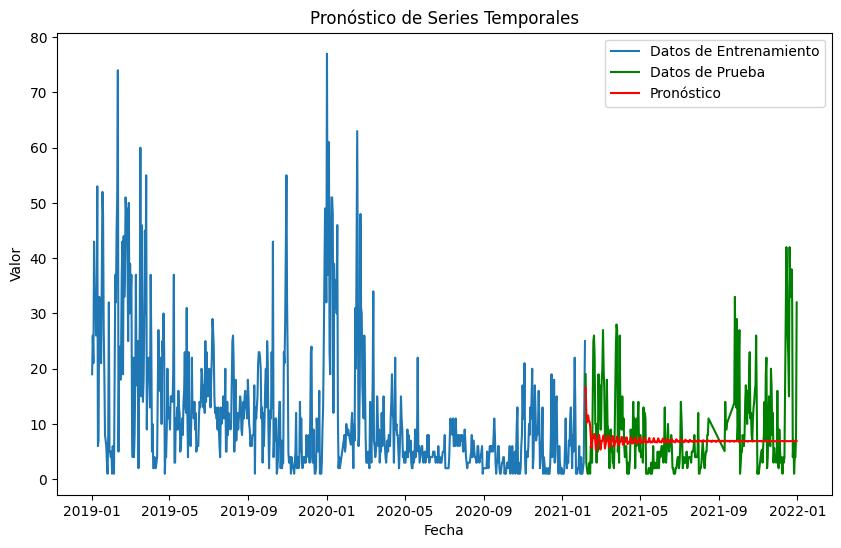

In [34]:
#Gráfica de los datos originales y el pronóstico
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba', color='green')
plt.plot(test_data.index, forescast, label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

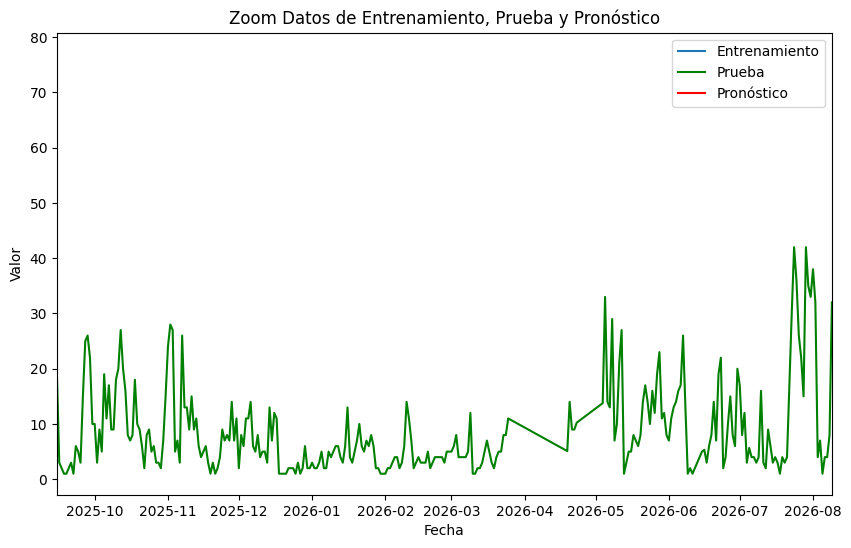

In [35]:
#Zoom de datos de prueba y pronóstico
# Hacer pronósticos
forecast = model_fit.forecast(steps=len(test_data))

# Configurar las fechas para los datos de entrenamiento, prueba y pronóstico
train_dates = pd.date_range(start='2023-08-10', periods=len(train_data), freq='D')  # Ajusta las fechas
test_dates = pd.date_range(start=train_dates[-1] + pd.Timedelta(days=1), periods=len(test_data), freq='D')

# Crear la serie de tiempo para los pronósticos
forecast_dates = test_dates
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plotear los datos de entrenamiento, prueba y pronóstico
plt.figure(figsize=(10, 6))
plt.plot(train_dates, train_data, label='Entrenamiento')
plt.plot(test_dates, test_data, label='Prueba', color='green')
plt.plot(forecast_dates, forecast_series, label='Pronóstico', color='red')

# Hacer zoom en la parte de la gráfica donde empiezan los datos de prueba y pronóstico
plt.xlim([test_dates[0], test_dates[-1]])  # Establecer límites del eje x

# Añadir títulos y leyenda
plt.title('Zoom Datos de Entrenamiento, Prueba y Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Mostrar la gráfica
plt.show()

Longitud de train_data: 767
Longitud de errors: 329


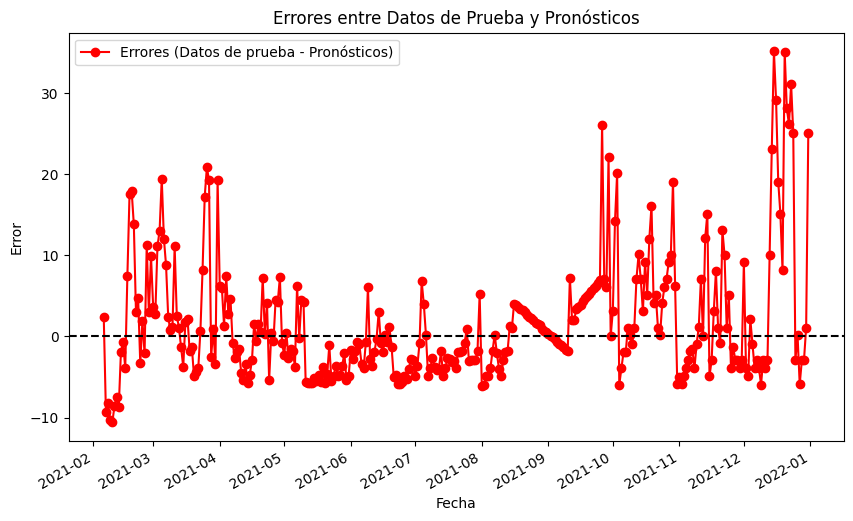

In [36]:
import matplotlib.pyplot as plt

# Como 'train_data' contiene los valores reales de entrenamiento
# y 'forecast_data' contiene los valores pronosticados

# Calcular los errores (residuales) entre los datos reales y los pronósticos
errors = test_data - forecast

print(f"Longitud de train_data: {len(train_data)}")
print(f"Longitud de errors: {len(errors)}")

# Asegúrando que train_data y errors tengan la misma longitud
min_length = min(len(test_data), len(errors))
train_data = test_data[:min_length]
errors = errors[:min_length]

# Graficar los errores
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, errors, marker='o', linestyle='-', color='red', label='Errores (Datos de prueba - Pronósticos)')

# Añadir títulos y etiquetas
plt.title('Errores entre Datos de Prueba y Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.axhline(y=0, color='black', linestyle='--')  # Línea horizontal en y=0 para referencia
plt.legend()

# Rotar las etiquetas de las fechas si es necesario
plt.gcf().autofmt_xdate()

# Mostrar la gráfica
plt.show()

# Mostrar la gráfica
plt.show()